# Chapitre 8 : Préprocessing

La préparation de données en machine learning est une etapes primordiale pour avoir.Elle nous aide a eliminée au maximum les données eronées et bien plus encore.

Les étapes du préprocessing:

1. **Encodage** : Qui consiste a representé des données qualitatives en données numériques.
2. **Normalisation** : Permet de mettre au meme echéle toutes les données quantitative. facilite l'apprentissage
3. **Imputation** : Remplacer les donées manquante par des données statistiques.
4. **Sélection** : Utilise les testes statistiques pour selectionnée les variables les plus utiles pour notre modèle.
5. **Extraction** : Générer des nouvelles variables  appartir d'inforamtions caché au dataset.

En Sklearn: 
- [ Encodage, Normalisation] => sklearn.preprocessing.
- imputation => sklearn.impute .
- sélection => sklearn.feature_selection .
- sklearn.feature_extraction.

In [189]:
from sklearn.preprocessing import *
import numpy as np
import matplotlib.pyplot as plt

## 8.1 Encodage
### 8.1.1 Transformeurs Ordinaires

In [190]:
X=np.array(['Chat', 'Chien', 'Chat', 'Oiseau'])
encoder=LabelEncoder()#developpe une méthode en analysant les données de train_set
encoder.fit_transform(X)#applique la transformation sur toutes les données quand lui fournit

array([0, 1, 0, 2])

In [191]:
encoder.inverse_transform([0, 1, 1])#décodage.

array(['Chat', 'Chien', 'Chien'], dtype='<U6')

In [192]:
Y=np.array([['Chat', 'Poils'],
            ['Chien', 'Poils'],
            ['Oiseau', 'Plumes']
])
encoder_ordi=OrdinalEncoder()
encoder_ordi.fit_transform(Y)

array([[0., 1.],
       [1., 1.],
       [2., 0.]])

In [193]:
encoder_ordi.inverse_transform([[0,0]])

array([['Chat', 'Plumes']], dtype='<U6')

### 8.1.2 Transformeurs Hots
Pour evité l'exersion des operations arithmitiques (comme la comparaison) sur les catégories. On utilise *Encodage One Hot*

In [194]:
encoder_b = LabelBinarizer(sparse_output=True)#sparse_output=True: activer la compression <=> OneHotEncoder()
encoder_b.fit_transform(X)

<4x3 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [195]:
encoder_b.inverse_transform(np.array([[1,0,0]]))

array(['Chat'], dtype='<U6')

Sur Un tableau multidimentionnel on utilise la class **OneHotEncoder()** Pour encoder les données.

**Exemple**
|   | Encodage Ordinal | Encodage OneHot | 
|:-:|:---------------:|:---------------:|
| X | LabelEncoder    |  LabelBinarizer |
| y | OrdianlEncoder  | OneHotEncoder   |



## 8.2 Normalisation

### 8.2.1 Nomralisation Min Max

In [196]:
X_train=np.array([[70], [80], [120]])

**MinMaxScaler**: tranforme chaque valeur pour qu'elle soit comprise entre 0 et 1

In [197]:
#Xscal=(X - Xmin)/(Xmax - Xmin)
scaler=MinMaxScaler()
X_train_sc=scaler.fit_transform(X_train)
X_train_sc

array([[0. ],
       [0.2],
       [1. ]])

Application sur les fleurs d'iris

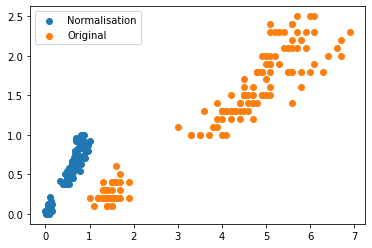

In [198]:
from sklearn.datasets import load_iris
iris=load_iris()
data=iris.data
data_scal=MinMaxScaler().fit_transform(data)
plt.scatter(data_scal[:, 2], data_scal[:, 3], label='Normalisation')
plt.scatter(data[:, 2], data[:, 3], label='Original')
plt.legend()
plt.show()

### 8.2.2 Standardisation

**StandardScaler**: tranforme les données pour ressemblé a la loi normale (X-moy)/ecar

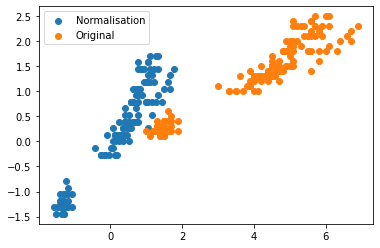

In [199]:
data_scal=StandardScaler().fit_transform(data)
plt.scatter(data_scal[:, 2], data_scal[:, 3], label='Normalisation')
plt.scatter(data[:, 2], data[:, 3], label='Original')
plt.legend()
plt.show()

Ces Methode de standardisation sont sensible au valeurs abérantes (outliers).

il existe une autre méthode qui est peu sensible au outliers c'est la méthode **RobustScaler()** 

Xscal=(X-median)/IQR =(Q3-Q1)

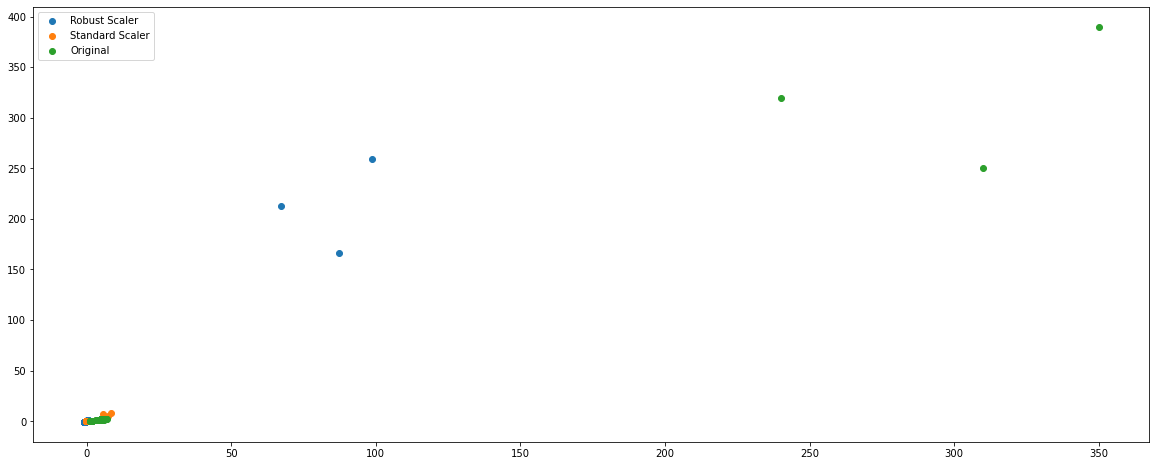

In [200]:
outliers = 10*np.random.randint(20, 40, [3, 4])

data=np.vstack((data, outliers))
data_scal=RobustScaler().fit_transform(data)
data_scal_nomr=StandardScaler().fit_transform(data)
plt.figure(figsize=(20, 8))
plt.scatter(data_scal[:, 2], data_scal[:, 3], label='Robust Scaler')
plt.scatter(data_scal_nomr[:, 2], data_scal_nomr[:, 3], label='Standard Scaler')
plt.scatter(data[:, 2], data[:, 3], label='Original')
plt.legend()
plt.show()

On remarque que La methode robust raduit les distance sans déformé les données

## 8.3 Imputation

### 8.3.1 Imputation Simple

**Simple Imputer**

In [201]:
from sklearn.impute import SimpleImputer

In [202]:
X=np.array([
    [2, 3, 4, 5],
    [np.nan, 4, 2, 6],
    [np.nan, 1, np.nan, np.nan]
])
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')#Les nan vont etre remplacé par la moyenne des colonnes.
imputer.fit_transform(X)


array([[2. , 3. , 4. , 5. ],
       [2. , 4. , 2. , 6. ],
       [2. , 1. , 3. , 5.5]])

Il exist une autre methode qui est KNNImputer qui consist a attributé une classe a une valeur nan en fonction du plus proche voison. Cette methode peut avéré plus efficasse que a moyenne est plus intéressante.

**KNN Imputer**

In [203]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors =1)#Les nan vont etre remplacé par la moyenne des colonnes.
imputer.fit_transform(X)

array([[2., 3., 4., 5.],
       [2., 4., 2., 6.],
       [2., 1., 4., 5.]])

**Missing Indicator**

In [204]:
from sklearn.impute import MissingIndicator
imputer = MissingIndicator()#Les nan vont etre remplacé par la moyenne des colonnes.
imputer.fit_transform(X)

array([[False, False, False],
       [ True, False, False],
       [ True,  True,  True]])

## 8.4 Selection

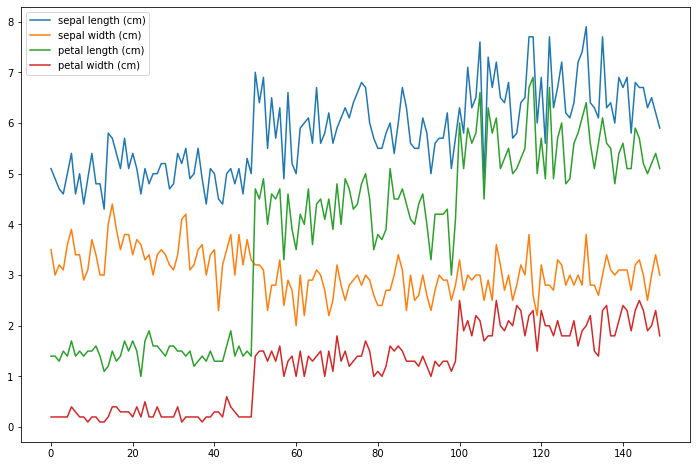

In [205]:
from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data
y=iris.target
plt.figure(figsize=(12, 8))
plt.plot(X)
plt.legend(iris.feature_names)


In [206]:
X.var( axis=0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

**Variance Threshold**

array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

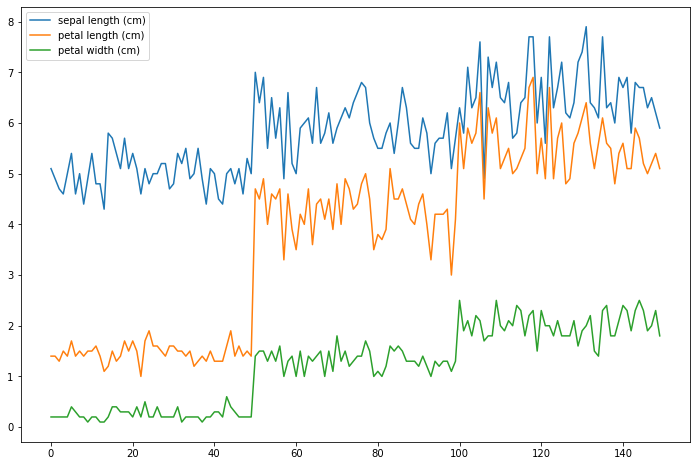

In [207]:
from sklearn.feature_selection import VarianceThreshold
selector= VarianceThreshold(threshold=0.2)
selected_X=selector.fit_transform(X)
plt.figure(figsize=(12, 8))
plt.plot(selected_X)
plt.legend(np.array(iris.feature_names)[selector.get_support()])
#selectinner les colonnes restantes.
np.array(iris.feature_names)[selector.get_support()]


**Select KBest**

In [208]:
from sklearn.feature_selection import chi2, SelectKBest
chi2(X, y)
selector=SelectKBest(chi2, k=2)#laisser que 2 classes qui on le meilleurs score de variance.
selector.fit_transform(X, y)
np.array(iris.feature_names)[selector.get_support()]

array(['petal length (cm)', 'petal width (cm)'], dtype='<U17')

**Select From Model**

In [226]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(SGDClassifier(random_state=0),
                           threshold='mean')#step le nombre de variable a éliminé (les moins important)
selector.fit_transform(X, y)
print(selector.get_support())
print(selector.estimator_.coef_)# si (moy_colonne > moyenne_generale) on garde la classe sinon on supprime

[False False  True  True]
[[  8.64029104  27.2851296  -40.01819009 -17.73533424]
 [ -5.48888269 -58.79616709  22.88584985 -54.14457159]
 [-81.28026953 -75.17372078 130.76437145 131.39608339]]


## 8.3 Application - PIPLINES

### 8.3.1 Manière brut de créer un pipline

In [210]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

iris_dataset=load_iris()
X = iris_dataset.data
y = iris_dataset.target

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=5)

In [211]:
#Transformer
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)#fit_transform: pour la data d'entrainement

#Estimator
model = SGDClassifier()
model.fit(X_train_transformed, y_train)

#Test
X_test_transformed = scaler.transform(X_test)#transform : data Test va etre normalisé selont data_train.
model.predict(X_test)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

Transformer( Encodage + Normalisation ) <=>  Estimateur Composite

### 8.3.2 Création Pipline Avec sklearn

In [212]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(StandardScaler(), SGDClassifier())
model.fit(X_train, y_train)
model.predict(X_test)

array([1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 1, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

### 8.3.3 Création Des Pipline Avancés

In [213]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import *
from sklearn.impute import SimpleImputer
from sklearn.linear_model import SGDClassifier

In [214]:
data=pd.read_excel('src/datasets/titanic.xls')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [215]:
y = data['survived']
X = data.drop('survived', axis=1)

La fonction StandardScaler() Accépte que des nombre et non pas des chaines c'est pour ca il faut triée et donner certaine variable a certain transformer et d'autre variable a d'autre transformer. 

In [216]:
from sklearn.compose import make_column_transformer
numerical_features = ['pclass', 'age', 'fare']
categorical_features = ['sex']

numerical_pipline = make_pipeline(SimpleImputer(), StandardScaler())
categorical_pipline = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='most_frequent'), OneHotEncoder())

preprocessor = make_column_transformer((numerical_pipline, numerical_features),
                                      (categorical_pipline, categorical_features)
                                        )
model= make_pipeline(preprocessor, SGDClassifier())
model


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['pclass', 'age', 'fare']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['sex'])])),
                ('sgdclassifier', SGDClassifier())])

In [217]:
model.fit(X, y)
model.predict

<bound method Pipeline.predict of Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['pclass', 'age', 'fare']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                

## 8.4 Application

In [218]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

iris_dataset=load_iris()
X = iris_dataset.data
y = iris_dataset.target



### 8.4.1 Split Data

In [219]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=5)

### 8.4.2 Make Pipline

In [220]:
model=make_pipeline(PolynomialFeatures(),#Transformer
                    StandardScaler(),#Normalisation
                    SGDClassifier())#Estimator
model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

### 8.4.3 Search Best Params

In [221]:
#on peut mettre tout les parametres des transformer ainsi que de l'estimateur
params = { 
    'polynomialfeatures__degree' : [2, 3, 4],
    'sgdclassifier__penalty' : ['l1', 'l2']
}
grid=GridSearchCV(model, param_grid=params, cv=4)

### 8.4.4 Traning

In [222]:
grid.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdclassifier', SGDClassifier())]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4],
                         'sgdclassifier__penalty': ['l1', 'l2']})

In [223]:
grid.best_params_ #Meilleur parametres

{'polynomialfeatures__degree': 4, 'sgdclassifier__penalty': 'l1'}

### 8.4.5 Evaluation 

In [224]:
grid.score(X_test, y_test)

0.9666666666666667

In [225]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, grid.predict(X_test))
cm

array([[ 8,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 10]])

### 8.4.6 Learning curve